In [1]:
import experimental_design.config as config
parameter_space = config.get_parameter_space()

In [2]:
def to_single_value_dict(d: dict) -> dict:
    for k in d.keys():
        d[k] = d[k][0]
    return d

In [3]:
import pickle

timeloss_emukit_model = pickle.load(open('../experimental_design/models/20_init_200_loop_model_timeLoss.pkl', "rb"))
timeloss_emukit_model.optimize()
emissions_emukit_model = pickle.load(open('../experimental_design/models/20_init_200_loop_model_emissions.pkl', "rb"))
emissions_emukit_model.optimize()

Optimization restart 1/5, f = -334.3922349318877
Optimization restart 2/5, f = -334.3922332023123
Optimization restart 3/5, f = -334.3922349314556
Optimization restart 4/5, f = -334.3922349319184
Optimization restart 5/5, f = -334.3922349319327
Optimization restart 1/5, f = 539.7882823292514
Optimization restart 2/5, f = 869.8765359711776
Optimization restart 3/5, f = 539.7882823305654
Optimization restart 4/5, f = 539.7882823292589
Optimization restart 5/5, f = 539.788282329366


In [4]:
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity

num_monte_carlo_points=100000

timeloss_sensitivity_sumo=MonteCarloSensitivity(model=timeloss_emukit_model, input_domain=parameter_space)
timeloss_main_effects, timeloss_total_effects, _ = timeloss_sensitivity_sumo.compute_effects(num_monte_carlo_points=num_monte_carlo_points)

emissions_sensitivity_sumo=MonteCarloSensitivity(model=emissions_emukit_model, input_domain=parameter_space)
emissions_main_effects, emissions_total_effects, _ = emissions_sensitivity_sumo.compute_effects(num_monte_carlo_points=num_monte_carlo_points)

In [5]:
main_effects_dict = {
    'Time Loss': to_single_value_dict(timeloss_main_effects),
    'Emissions': to_single_value_dict(emissions_main_effects),
}
total_effects_dict = {
    'Time Loss': to_single_value_dict(timeloss_total_effects),
    'Emissions': to_single_value_dict(emissions_total_effects),
}

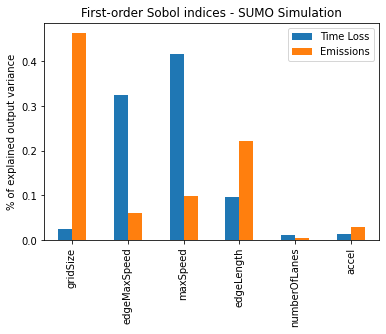

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pd.DataFrame(main_effects_dict).plot.bar(ax=ax)
ax.set_title('First-order Sobol indices - SUMO Simulation')
ax.set_ylabel('% of explained output variance')
fig.show()

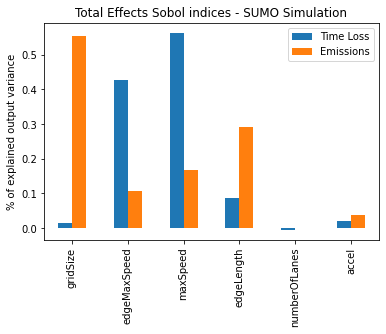

In [7]:
fig, ax = plt.subplots()
pd.DataFrame(total_effects_dict).plot.bar(ax=ax)
ax.set_title('Total Effects Sobol indices - SUMO Simulation')
ax.set_ylabel('% of explained output variance')
fig.show()